In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Unpack lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. 
lat_lngs = zip(lats, lngs)
lat_lngs

# One can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure to unzip the latitudes and longitudes into the coordinates list before moving on.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print (coordinates)

[(-48.00141996963125, -159.7545197661971), (-55.798163577309396, -93.63154744403028), (-45.21434954392533, -7.982293269767695), (-65.79163980152038, -45.84937048238493), (-42.18850339221717, 30.15915543724077), (-22.191120657375507, 26.96983871083114), (33.632147538145105, -143.9590686436623), (12.554337638521005, -145.1592097833658), (21.58073459443895, -56.5601756449214), (66.34868171025124, -87.62638010899872), (81.50766715842909, -76.76974927550026), (42.63062882932013, 158.63844285783608), (-55.6275761547017, -15.560701106245347), (16.28174717029995, -95.94749221672753), (25.433843217953665, 32.62191310509749), (-75.46597162732664, -94.45774223990772), (-57.41260756469653, -106.85688015976774), (84.66583643681221, -147.67986157647215), (-32.76016808959463, -27.114646596474927), (8.758246965739517, 160.3397455551143), (26.761852005587215, 56.89610186411497), (19.71240370510641, -161.94694116139985), (-11.062997030298831, 50.60933041782545), (-63.488474496796314, -19.708890053166897

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-48.00141996963125 -159.7545197661971
-55.798163577309396 -93.63154744403028
-45.21434954392533 -7.982293269767695
-65.79163980152038 -45.84937048238493
-42.18850339221717 30.15915543724077
-22.191120657375507 26.96983871083114
33.632147538145105 -143.9590686436623
12.554337638521005 -145.1592097833658
21.58073459443895 -56.5601756449214
66.34868171025124 -87.62638010899872
81.50766715842909 -76.76974927550026
42.63062882932013 158.63844285783608
-55.6275761547017 -15.560701106245347
16.28174717029995 -95.94749221672753
25.433843217953665 32.62191310509749
-75.46597162732664 -94.45774223990772
-57.41260756469653 -106.85688015976774
84.66583643681221 -147.67986157647215
-32.76016808959463 -27.114646596474927
8.758246965739517 160.3397455551143
26.761852005587215 56.89610186411497
19.71240370510641 -161.94694116139985
-11.062997030298831 50.60933041782545
-63.488474496796314 -19.708890053166897
88.1551247290727 -55.07429715444641
46.69093558476732 -108.98910830437777
47.43102288119971 -1

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ed4ffa7d0c0d9e7d98c193cbae2d9fd


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [10]:
cities

['mataura',
 'punta arenas',
 'saldanha',
 'ushuaia',
 'port alfred',
 'serowe',
 'hilo',
 'codrington',
 'attawapiskat',
 'qaanaaq',
 'severo-kurilsk',
 'cape town',
 'mixtequilla',
 'esna',
 'barrow',
 'arraial do cabo',
 'butaritari',
 'minab',
 'kapaa',
 'ambilobe',
 'chuy',
 'upernavik',
 'lewistown',
 'kodiak',
 'yellowknife',
 'west helena',
 'ancud',
 'longyearbyen',
 'severnyy',
 'xinzhou',
 'hermanus',
 'tuktoyaktuk',
 'jamestown',
 'chokurdakh',
 'vao',
 'coquimbo',
 'itaqui',
 'padang',
 'nagornyy',
 'sines',
 'busselton',
 'warqla',
 'ribeira grande',
 'lata',
 'inhambane',
 'bilma',
 'carnarvon',
 'kruisfontein',
 'huilong',
 'mao',
 'bluff',
 'lebu',
 'castro',
 'airai',
 'georgetown',
 'sabile',
 'teruel',
 'mar del plata',
 'yenagoa',
 'atuona',
 'barentsburg',
 'port elizabeth',
 'kagadi',
 'klaksvik',
 'puerto ayora',
 'sisimiut',
 'torata',
 'honningsvag',
 'east london',
 'tilichiki',
 'thompson',
 'rikitea',
 'amderma',
 'nikolskoye',
 'vaini',
 'aktau',
 'arlit',

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | mataura
Processing Record 2 of Set 12 | punta arenas
Processing Record 3 of Set 12 | saldanha
Processing Record 4 of Set 12 | ushuaia
Processing Record 5 of Set 12 | port alfred
Processing Record 6 of Set 12 | serowe
Processing Record 7 of Set 12 | hilo
Processing Record 8 of Set 12 | codrington
Processing Record 9 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 12 | qaanaaq
Processing Record 11 of Set 12 | severo-kurilsk
Processing Record 12 of Set 12 | cape town
Processing Record 13 of Set 12 | mixtequilla
City not found. Skipping...
Processing Record 14 of Set 12 | esna
Processing Record 15 of Set 12 | barrow
Processing Record 16 of Set 12 | arraial do cabo
Processing Record 17 of Set 12 | butaritari
Processing Record 18 of Set 12 | minab
Processing Record 19 of Set 12 | kapaa
Processing Record 20 of Set 12 | ambilobe
Processing Record 21 of Set 12 | chuy
Processing Record 22 of Set 12 | upernavik
Processing Record 23 

Processing Record 38 of Set 15 | taolanaro
City not found. Skipping...
Processing Record 39 of Set 15 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 15 | lakes entrance
Processing Record 41 of Set 15 | pisco
Processing Record 42 of Set 15 | carballo
Processing Record 43 of Set 15 | sabha
Processing Record 44 of Set 15 | nador
Processing Record 45 of Set 15 | kirakira
Processing Record 46 of Set 15 | sinnamary
Processing Record 47 of Set 15 | broken hill
Processing Record 48 of Set 15 | salalah
Processing Record 49 of Set 15 | santa marinella
Processing Record 50 of Set 15 | camana
Processing Record 1 of Set 16 | souillac
Processing Record 2 of Set 16 | obo
Processing Record 3 of Set 16 | mahebourg
Processing Record 4 of Set 16 | voh
Processing Record 5 of Set 16 | oussouye
Processing Record 6 of Set 16 | tutoia
Processing Record 7 of Set 16 | barabai
Processing Record 8 of Set 16 | baneasa
Processing Record 9 of Set 16 | gogrial
Processing Record 10 of Set 16 | 

Processing Record 24 of Set 19 | krasnyy chikoy
Processing Record 25 of Set 19 | luderitz
Processing Record 26 of Set 19 | porto belo
Processing Record 27 of Set 19 | akdepe
Processing Record 28 of Set 19 | naron
Processing Record 29 of Set 19 | payo
Processing Record 30 of Set 19 | nerchinskiy zavod
Processing Record 31 of Set 19 | itoman
Processing Record 32 of Set 19 | beyneu
Processing Record 33 of Set 19 | chesma
Processing Record 34 of Set 19 | mareeba
Processing Record 35 of Set 19 | sayville
Processing Record 36 of Set 19 | sur
Processing Record 37 of Set 19 | puerto del rosario
Processing Record 38 of Set 19 | sorvag
City not found. Skipping...
Processing Record 39 of Set 19 | hurricane
Processing Record 40 of Set 19 | ojinaga
Processing Record 41 of Set 19 | vanimo
Processing Record 42 of Set 19 | barcelos
Processing Record 43 of Set 19 | grootfontein
Processing Record 44 of Set 19 | sergeyevka
Processing Record 45 of Set 19 | cordoba
Processing Record 46 of Set 19 | gambela


Processing Record 11 of Set 23 | mayo
Processing Record 12 of Set 23 | araripe
Processing Record 13 of Set 23 | okhotsk
Processing Record 14 of Set 23 | slave lake
Processing Record 15 of Set 23 | isiro
Processing Record 16 of Set 23 | iqaluit
Processing Record 17 of Set 23 | catamarca
Processing Record 18 of Set 23 | miyang
Processing Record 19 of Set 23 | whitianga
Processing Record 20 of Set 23 | the valley
Processing Record 21 of Set 23 | alvaraes
Processing Record 22 of Set 23 | kifri
Processing Record 23 of Set 23 | viisoara
Processing Record 24 of Set 23 | esperance
Processing Record 25 of Set 23 | havre-saint-pierre
Processing Record 26 of Set 23 | cuiluan
Processing Record 27 of Set 23 | kosa
Processing Record 28 of Set 23 | pingliang
Processing Record 29 of Set 23 | honiara
Processing Record 30 of Set 23 | miraflores
Processing Record 31 of Set 23 | neiafu
Processing Record 32 of Set 23 | maxixe
Processing Record 33 of Set 23 | masvingo
Processing Record 34 of Set 23 | hailar

In [12]:
# Tally the number of cities in the city_data array of dictionaries
len(city_data)

544

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,57.47,98,100,3.29,NZ,2022-05-07 19:34:46
1,Punta Arenas,-53.1500,-70.9167,51.12,66,51,24.09,CL,2022-05-07 19:34:46
2,Saldanha,-33.0117,17.9442,53.65,70,0,20.96,ZA,2022-05-07 19:34:47
3,Ushuaia,-54.8000,-68.3000,53.26,47,20,24.16,AR,2022-05-07 19:34:47
4,Port Alfred,-33.5906,26.8910,64.18,80,100,3.00,ZA,2022-05-07 19:34:48
5,Serowe,-22.3833,26.7167,65.91,35,85,3.83,BW,2022-05-07 19:34:48
6,Hilo,19.7297,-155.0900,88.29,81,20,3.00,US,2022-05-07 19:33:35
7,Codrington,-38.2667,141.9667,53.38,83,73,8.59,AU,2022-05-07 19:34:49
8,Qaanaaq,77.4840,-69.3632,19.76,79,100,1.05,GL,2022-05-07 19:34:49
9,Severo-Kurilsk,50.6789,156.1250,39.85,91,100,4.21,RU,2022-05-07 19:34:50


In [14]:
# Reorder the Columns of the DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-05-07 19:34:46,-46.1927,168.8643,57.47,98,100,3.29
1,Punta Arenas,CL,2022-05-07 19:34:46,-53.1500,-70.9167,51.12,66,51,24.09
2,Saldanha,ZA,2022-05-07 19:34:47,-33.0117,17.9442,53.65,70,0,20.96
3,Ushuaia,AR,2022-05-07 19:34:47,-54.8000,-68.3000,53.26,47,20,24.16
4,Port Alfred,ZA,2022-05-07 19:34:48,-33.5906,26.8910,64.18,80,100,3.00
5,Serowe,BW,2022-05-07 19:34:48,-22.3833,26.7167,65.91,35,85,3.83
6,Hilo,US,2022-05-07 19:33:35,19.7297,-155.0900,88.29,81,20,3.00
7,Codrington,AU,2022-05-07 19:34:49,-38.2667,141.9667,53.38,83,73,8.59
8,Qaanaaq,GL,2022-05-07 19:34:49,77.4840,-69.3632,19.76,79,100,1.05
9,Severo-Kurilsk,RU,2022-05-07 19:34:50,50.6789,156.1250,39.85,91,100,4.21


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1651954591.232261

In [18]:
# Use string format method to reformat the datetime stamp.
today = time.strftime("%x")
today

'05/07/22'

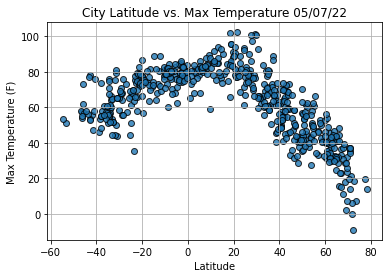

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

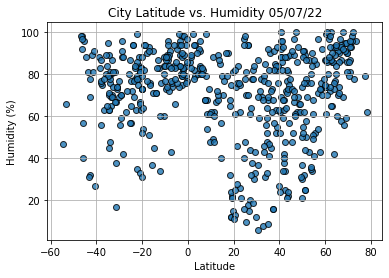

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()